# Introduction

Welcome to the "Data Science Salary -  (EDA)" notebook! In this notebook, we will explore a dataset contains information about data science salaries, including factors like work year, experience level, employment type, job title, salary in USD, employee residence, remote ratio, company location, and company size.

The goal of this EDA is to explore the relationships between these variables and gain insights into data science salary trends.


# Import Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('seaborn-v0_8')

# Load the dataset

In [3]:
df = pd.read_csv('/content/salaries.csv')

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M


# Remove Duplicates

In [5]:
df.shape

(13972, 11)

In [6]:
df.duplicated().sum()

5378

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(8594, 11)

# Dataset information

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8594 entries, 0 to 13971
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8594 non-null   int64 
 1   experience_level    8594 non-null   object
 2   employment_type     8594 non-null   object
 3   job_title           8594 non-null   object
 4   salary              8594 non-null   int64 
 5   salary_currency     8594 non-null   object
 6   salary_in_usd       8594 non-null   int64 
 7   employee_residence  8594 non-null   object
 8   remote_ratio        8594 non-null   int64 
 9   company_location    8594 non-null   object
 10  company_size        8594 non-null   object
dtypes: int64(4), object(7)
memory usage: 805.7+ KB


# Describe dataset

In [14]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,8594.000000,8.594000e+03,8594.000000,8594.000000
mean,2023.091808,1.729008e+05,146745.224343,37.229462
std,0.773301,4.642394e+05,72989.158332,47.619870
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,9.600000e+04,95019.000000,0.000000
50%,2023.000000,1.400000e+05,138750.000000,0.000000
75%,2024.000000,1.885000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [15]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

# The number of unique values for each column

In [16]:
for col in df.columns:
    unique_values= df[col].value_counts().tolist()
    unique_num = len(df[col].value_counts())
    print(f'{col} : {unique_num}')

work_year : 5
experience_level : 4
employment_type : 4
job_title : 146
salary : 2237
salary_currency : 23
salary_in_usd : 2596
employee_residence : 88
remote_ratio : 3
company_location : 77
company_size : 3


#Checking the null values

In [17]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Replace the abbreviations with their corresponding ones for more clarity

In [18]:
df['experience_level'].replace({'EN':'Entry-Level','MI':'Mid-Level','EX':'Executive Level','SE':'Senior'},inplace=True)
df['employment_type'].replace({'PT':'Part-Time','FT':'Full-Time','CT':'Contract','FL':'Freelance'},inplace=True)
df['company_size'].replace({'L':'Large','M':'Medium','S':'Small'},inplace=True)

# Distribution of numerical features

Numerical Features: ['work_year', 'salary', 'salary_in_usd', 'remote_ratio'] 



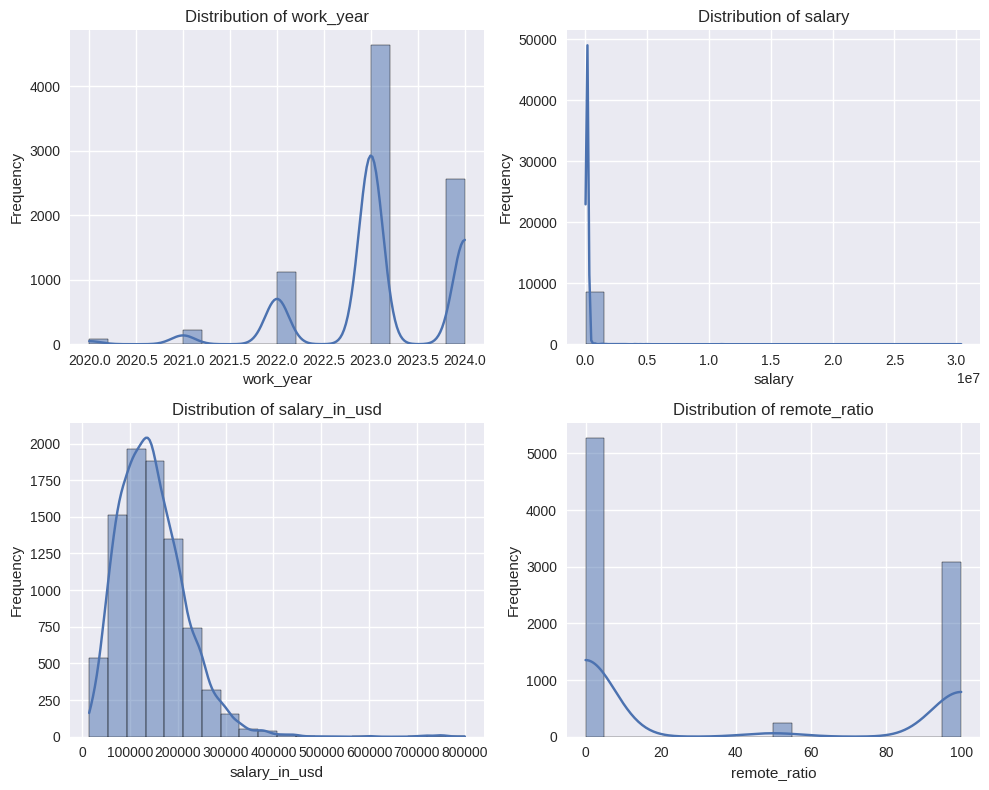

In [19]:
# Select numerical features
numeric_cols = df.select_dtypes(include=['int64']).columns.tolist()
print("Numerical Features:", numeric_cols, "\n")  # Print for clarity

# Create a figure for subplots
plt.figure(figsize=(10, 8))

# Loop through each numerical feature
for id, feature in enumerate(numeric_cols):
    # Create subplots (2 rows, number of columns based on the number of features)
    plt.subplot(2, len(numeric_cols) // 2, id + 1)

    # Generate the distribution plot using seaborn's histplot
    sns.histplot(df[feature], kde=True, bins=20)

    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**Inference:**
1.  **Work Year Distribution:**
      - Potential Increase Over Time: The distribution appears to be right-skewed, with a higher concentration of data points in recent years (2022, 2023, and 2024) compared to earlier ones (2020 and 2021). This indicate a growing field of data science attracting more professionals, and an increased collection of data in recent years.
2.  **Salary Distribution:**
      - Right-Skewed Distribution: The salary distribution is skewed right, with a concentration of data points towards the lower end (salaries) and a longer tail extending towards higher salaries. This shows that a larger portion of data scientists might fall within a certain salary range, with a smaller percentage earning significantly higher salaries.
1.  **Salary in USD Distribution:**
      - Similar to Salary Distribution: The distribution of salary in USD appears visually similar to the regular salary distribution, which is reasonable considering they are likely correlated.
1.  **Remote Ratio Distribution:**
      - Concentration in the Middle: The remote ratio distribution seems to be centered around the middle values (0.5), suggesting that a balanced mix of fully remote (1.0) and fully on-site (0.0) work arrangements might exist in the data. There's also a spread towards both ends, indicating the presence of both fully remote and fully on-site positions, as well as hybrid arrangements.



# Company size analysis with Pie Char

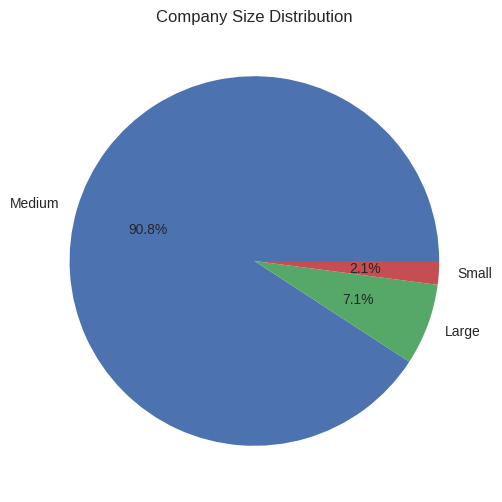

In [20]:
company_size_value_counts = df['company_size'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(company_size_value_counts, labels=company_size_value_counts.index, autopct='%1.1f%%')
plt.title('Company Size Distribution')
plt.show()

**Inference:**
> It appears that "Medium" sized companies comprise the largest portion of the dataset, as indicated by the largest arc size in the pie chart and the corresponding percentage label (around 90.8%).
while The remaining two categories, "Small" and "Large", seem to have a smaller presence in the data, represented by the smaller arc sizes and their percentage labels (likely around 2.1% for "Small" and 7.1% for "Large").



# Top 10 most common job titles in Data Science

In [32]:
# 1. Select the top 10 most common job titles:
top10_job_title = df['job_title'].value_counts().head(10)  # Keep only the first 10 entries

# 2. Create a bar chart using Plotly Express:
fig = px.bar(
    top10_job_title,  # Data for the chart
    x=top10_job_title.index,  # Set the job titles as the x-axis labels
    y=top10_job_title.values,  # Set the job title counts as the y-axis values
    color=top10_job_title.index,  # Color each bar based on the job title
    text=top10_job_title.values,  # Add text labels for the counts on the bars
    labels={'index':' ', 'y':'count', 'text':'count'},  # Adjust chart labels
    title='<b> Top 10 most common job titles in Data Sceince'  # Set the chart title
)

# 3. Display the chart:
fig.show()

**Inference:**

>  Data Engineer is the most common job title, likely signifying a high demand for professionals who can design, build, and maintain data infrastructure.

>  Data Scientist appears to be the second most prevalent role, indicating a strong need for individuals who can analyze and interpret data to extract knowledge.





# Top 10 Most Prevalent Companies in Data Science




In [28]:
# 1. Group data by company location:
company_counts = df.groupby('company_location')['company_location'].count().reset_index(name='count')

# 2. Sort the company counts in descending order:
top_10_companies = company_counts.sort_values(by='count', ascending=False).head(10)

# 3. Create a histogram using Plotly Express:
fig = px.bar(
    top_10_companies,
    x='company_location',
    y='count',
    color='company_location',
    text='count',
    labels={'company_location': 'Company Location', 'count': 'Number of Companies'},
    title='<b>Top 10 Most Prevalent Companies in Data Science',
)

# 4. Display the chart:
fig.show()


**Inference:**


> The majority of the top 10 companies are located in the United States, indicating its dominance in the data science industry.





#  Employment Type Analysis

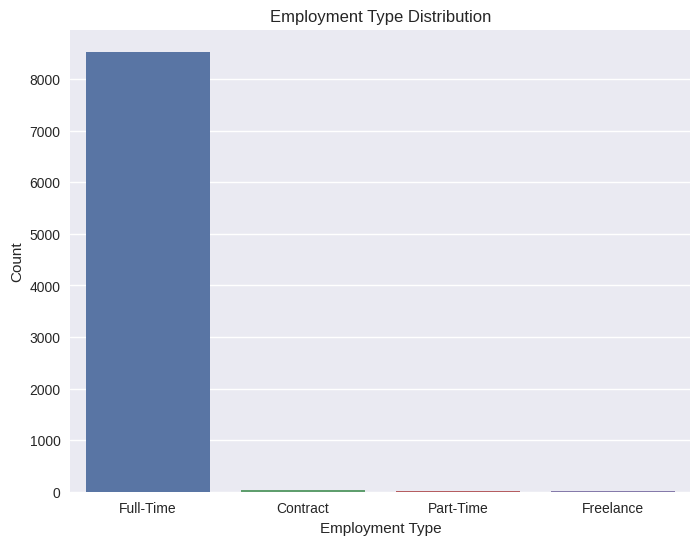

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='employment_type', hue='employment_type')
plt.title('Employment Type Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()

# Salary Analysis

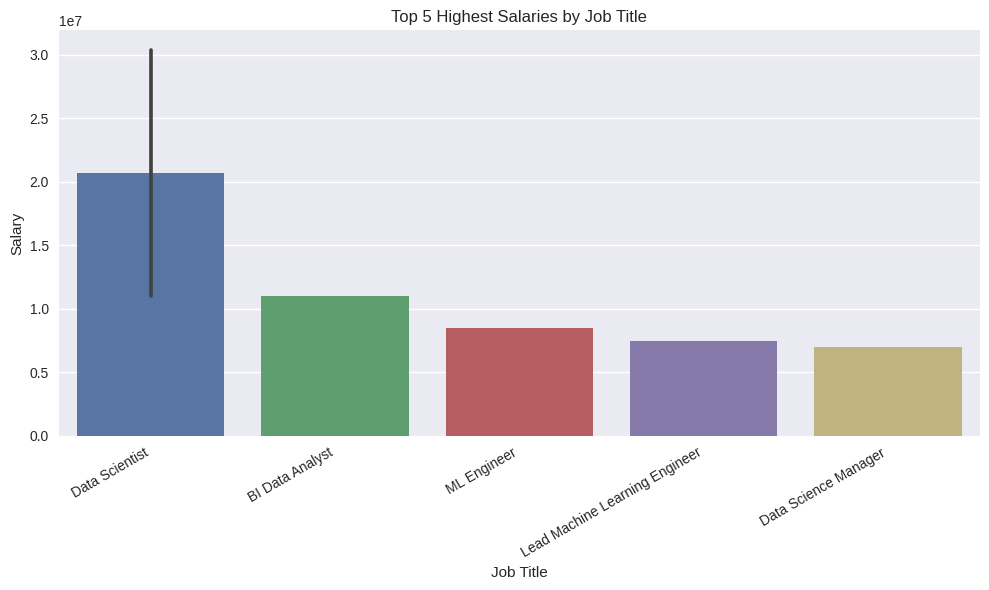

In [30]:
plt.figure(figsize=(10, 6))

df_sorted = df.sort_values(by='salary', ascending=False)

top_5_salaries = df_sorted.head(6)

sns.barplot(x='job_title', y='salary', data=top_5_salaries, hue='job_title')
plt.title('Top 5 Highest Salaries by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Employment Type vs. Salary Distribution

In [ ]:
# 1. Create a pie chart using Plotly Express:
fig = px.pie(
    df,  # Data source
    names='employment_type',  # Column for category names (employment types)
    values='salary_in_usd',  # Column for values (salary in USD)
    title='Employment Type vs. Salary Distribution',  # Set the chart title
    labels={  # Customize axis labels
        'employment_type': 'Employment Type',
        'salary_in_usd': 'Total Salary (USD)'
    },
    category_orders={  # Specify order for employment type categories
        "employment_type": ["Full-Time", "Contract", "Part-Time", "Freelance"]
    }
)

# 2. Display the chart:
fig.show()

**Inference:**


>  It appears that "Full-Time" employment makes up the largest portion of the total salary in USD. This suggests that full-time data scientists might contribute the most to the overall salary sum within this dataset.



**Conclusion**

In this notebook, we conducted an in-depth Exploratory Data Analysis (EDA) on the data science salary dataset. Through various analyses and visualizations, we gained valuable insights into the factors influencing data science salaries and the trends present in the data science job market.
Key Findings:



*   Salary Distribution: We observed that data science salaries
exhibit a wide range of distributions, with some positions commanding higher salaries than others.
*   Factors Influencing Salaries: Factors such as job title, experience level, and geographic location play significant roles in determining data science salaries. We found that certain job titles, industries, and regions are associated with higher salary ranges.

*   Experience level, Emplyment Type and company Location are the strongest predictors of salary, with higher experience levels and larger companies generally associated with higher salaries.
*  Job title also plays a role in salary determination, with certain titles commanding higher salaries than others.


**Trends in the Data Science Job Market**: We identified trends such as the increasing demand for Data engineers and data scientists, particularly in certain industries and regions.

These insights can be valuable for data science professionals, job seekers, recruiters, and employers in the data science field. Understanding salary trends and factors influencing salaries can help job seekers make informed career decisions, employers optimize their hiring strategies, and policymakers address workforce development needs in the data science industry.

**Lujain Moualla**